#### Anexo B

# Explorando Datos para TRANSFORMACIÓN LINEAL

#### Elaborado por: Ricardo Niño de Rivera Barrón

#### Ingeniería Biónica

#### Trabajo Terminal II

Con esta libreta interactiva desarrollamos una exploración de los datos en el conjunto de entranamiento con el fin de elaborar una ventana para la Tranformación Lineal de las matrices de temperatura (que son el tipo de dato que entrega la cámara infrarroja) a imágenes de 8 bits en escala de grises. 

Esta libreta interactiva en python 3.8 fue realizada localmente en un euqipo con Windows 7.

Importando bibliotecas.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

In [2]:
#Leyendo archivo csv
df=pd.read_csv('train.csv',  encoding = "ISO-8859-1")

In [3]:
df.head()

,ID,Records,Name,Age,Exams,Diagnosis,Side,Complaints,Mammography,Radiotherapy,...,Use of hormone replacement,Is there signal of wart on breast?,Wart,Body temperature,Race,Smoked,Drank coffe,Comsumed alcohol,Physical exercise,"Put some pomade, deodorant or products at breasts or armpits region?"
0,1,VoluntÃ¡ria,PRIVATE,72,Thermography,Healthy,NaN,NaN,1,0.0,...,0.0,1.0,both,34.9,Pardo,NaN,NaN,NaN,NaN,NaN
1,2,77020,PRIVATE,65,Thermography,Healthy,NaN,1.0,1,0.0,...,1.0,0.0,0,36.5,Pardo,0.0,0.0,0.0,0.0,0.0
2,4,VoluntÃ¡ria,PRIVATE,66,Thermography,Healthy,NaN,1.0,1,0.0,...,0.0,0.0,0,35.7,Black,NaN,NaN,NaN,NaN,NaN
3,5,VoluntÃ¡ria,PRIVATE,65,Thermography,Healthy,NaN,0.0,1,0.0,...,0.0,0.0,0,35.9,White,NaN,NaN,NaN,NaN,NaN
4,6,VoluntÃ¡ria,PRIVATE,53,Thermography,Healthy,NaN,0.0,0,0.0,...,0.0,0.0,0,35.4,Pardo,NaN,NaN,NaN,NaN,NaN


Debido a que el almacenamiento de imágenes en un arreglo saturaría la memoria, realizamos una iteración imagen por imagen en el directorio train, y almacanamos la temperatura máxima. Actualizamos la temperatura máxima cada vez que encontremos una mayor.  

In [4]:
#Buscando nombre de imágenes en el directorio de interés
files = os.listdir("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\train")

In [5]:
#Tamaño de la lista de nombre de archivos encontrados
len(files)

3337

In [6]:
#Realizando ciclo for para encontrar el másximo sin saturar memoria RAM

T_max=0 #Aquí almacenaremos la temperatura máxima

for i in files:
    
    temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\train\\"+i)
    T_temp=np.max(temp)
    
    if T_temp > T_max:
        T_max=T_temp

In [7]:
#Imprimiendo T_max
T_max

37.0

Ahora buscamos la temperatura mímina.
Aquí existen dos temperaturas mínimas de interés, la temperatura mínima de la imagen y la temperatura mínima del cuerpo. Por el momento encontraremos la temperatura mínima de la imagen. La temperatura mínima del cuerpo la hallaremos en un análisis posterior (que no se describe en esta libreta) con el fin de segmentar al cuerpo con respecto al fondo.

In [8]:
#Realizando ciclo for para encontrar el mínimo sin saturar memoria RAM

T_min=T_max #Aquí almacenaremos la temperatura mínima, se inicializa con T_max para empezar con el valor más alto posible

for i in files:
    
    temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\train\\"+i)
    T_temp=np.min(temp)
    
    if T_temp < T_min:
        T_min=T_temp

In [9]:
#Imprimiendo T_min
T_min

18.65

Ahora vamos a establecer un margen de error. 
Estableceremos 2 grados como una medida razonable para evitar problemas con el conjunto de validación y así abarcar la mayor cantidad temperaturas posibles en el análisis.

In [10]:
T_max=T_max+2
T_max

39.0

In [11]:
T_min=T_min-2
T_min

16.65

## Encontrando parámetros para la transformación lineal de los datos de termperatura a intensidad de píxel.

Ajustamos un modelo lineal mediante regresión utilizando la paquetería sciki leran. Los puntos serán (T_min, 0) y (T_max, 255)

In [129]:
temperaturas=np.array([[T_min],[T_max]])
pixels=np.array([[0],[255]])

In [130]:
reg=LinearRegression().fit(temperaturas,pixels)

In [132]:
#Valor de la pendiente de la recta
reg.coef_[0][0]

11.409395973154359

In [135]:
#Valor del interceptor, es b en una recta de la forma y = m*x + b.
reg.intercept_[0]

-189.96644295302002

In [137]:
#Hagamos una sencilla comprobación
print("El valor debería ser 255: "+str(T_max*reg.coef_[0][0] + reg.intercept_[0]))
print("El valor debería ser 0: "+str(T_min*reg.coef_[0][0] + reg.intercept_[0]))

El valor debería ser 255: 255.0
El valor debería ser 0: 2.842170943040401e-14


Como observamos, aunque no exactos, los valores son muy cercanos, esto se debe a la capacidad de memoria de la computadora para almacenar valor tan pequeños. Pero está bien para nuestro objetivo.

Ahora vamos a graficar nuestros puntos y la línea recta que representa nuestro modelo de tranformación lineal.

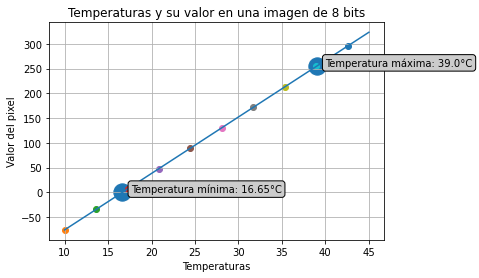

In [222]:
#Graficamos una recta

#Creando vector de entrada
X=np.linspace(10,45,30)

#Creando salidas a graficar
Y=X*(reg.coef_)[0][0] + reg.intercept_[0]

plt.plot(X,Y)
plt.grid()
plt.title("Temperaturas y su valor en una imagen de 8 bits")
plt.xlabel('Temperaturas')
plt.ylabel('Valor del pixel')
plt.scatter(temperaturas, pixels, s=300)
bbox = dict(boxstyle="round", fc="0.8")
plt.annotate("Temperatura mínima: "+str(T_min)+"°C", (T_min+1, 0),bbox=bbox)
plt.annotate("Temperatura máxima: "+str(T_max)+"°C", (T_max+1, 255),bbox=bbox)

#Graficamos los puntos generados individualmente cada multiplo de 3 iteraciones
for i in range(X.shape[0]):
    if i%3==0:
        plt.scatter(X[i],Y[i])

plt.savefig("TL_model", foramt="png")
plt.show()

## Creando imágenes de 256 bits

Para facilitar los análisis posteriores creamos nuevas imágenes de 256 bits.

In [165]:
#Creando carpeta BaseDeDatosFrontales_FINAL_256_bits
os.mkdir('BaseDeDatosFrontales_FINAL_256_bits')

In [166]:
#Creando subcarpeta train en BaseDeDatosFrontales_FINAL_256_bits
os.mkdir('BaseDeDatosFrontales_FINAL_256_bits\\train')

In [168]:
#Creando subcarpeta train en BaseDeDatosFrontales_FINAL_256_bits
os.mkdir('BaseDeDatosFrontales_FINAL_256_bits\\test')

Ahora leemos las imágenes originales, las convertimos a imágenes de 16 bits y las almacenamos en los nuevos directorios.

In [169]:
#Función para transformar linealmente una imagen
def TL(x):
    x=x*(reg.coef_)[0][0] + reg.intercept_[0]
    return x

In [186]:
#Función para asegurarnos que X contiene valores ENTEROS entre 0 y 255
def cleaner(x):
    x=np.around(x) #Redondeamos valores al entero más cercano
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i,j] > 255:
                x[i,j]=255
            elif x[i,j] < 0:
                x[i,j]=0
    return x.astype(int)

Notése que se retornan los valores como enteros, esto se realiza debido se desea disminuir el uso de la memoria en disco.

Ahora realizamos una prueba con una imagen aleatoria del conjunto de validación

In [194]:
#Buscamos y almacenamos los nombres de los archivos en files_test
files_test=os.listdir("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\test")

In [195]:
len(files_test)

832

In [197]:
#Prueba
hola=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\test\\"+files_test[100])

In [198]:
hola

array([[27.61, 28.27, 28.06, ..., 27.87, 27.81, 27.47],
       [28.3 , 28.39, 28.16, ..., 27.99, 27.98, 27.69],
       [28.32, 28.38, 28.23, ..., 27.94, 27.82, 27.64],
       ...,
       [20.14, 20.23, 20.17, ..., 20.19, 20.45, 20.3 ],
       [20.23, 20.2 , 20.14, ..., 20.59, 20.34, 20.17],
       [20.38, 20.24, 20.08, ..., 20.45, 20.42, 20.28]])

In [199]:
TL(hola)

array([[125.04697987, 132.57718121, 130.18120805, ..., 128.01342282,
        127.32885906, 123.44966443],
       [132.91946309, 133.94630872, 131.32214765, ..., 129.38255034,
        129.26845638, 125.95973154],
       [133.14765101, 133.83221477, 132.12080537, ..., 128.81208054,
        127.44295302, 125.38926174],
       ...,
       [ 39.81879195,  40.84563758,  40.16107383, ...,  40.38926174,
         43.3557047 ,  41.6442953 ],
       [ 40.84563758,  40.5033557 ,  39.81879195, ...,  44.95302013,
         42.10067114,  40.16107383],
       [ 42.55704698,  40.95973154,  39.13422819, ...,  43.3557047 ,
         43.01342282,  41.41610738]])

In [200]:
np.max(TL(hola))

209.24832214765104

In [203]:
np.min(TL(hola))

36.852348993288615

In [201]:
cleaner(TL(hola))

array([[125, 133, 130, ..., 128, 127, 123],
       [133, 134, 131, ..., 129, 129, 126],
       [133, 134, 132, ..., 129, 127, 125],
       ...,
       [ 40,  41,  40, ...,  40,  43,  42],
       [ 41,  41,  40, ...,  45,  42,  40],
       [ 43,  41,  39, ...,  43,  43,  41]])

In [202]:
np.max(cleaner(TL(hola)))

209

In [204]:
np.min(cleaner(TL(hola)))

37

Vamos a poner a prueba aún más a las funciones, vamos a asignar dos valores extremos en posiciones cualesquiera. Los valores extremos serán -5 grados y 45 grados.

In [ ]:
#Leemos el mismo archivo en test

In [209]:
hola=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\test\\"+files_test[100])

In [210]:
hola

array([[27.61, 28.27, 28.06, ..., 27.87, 27.81, 27.47],
       [28.3 , 28.39, 28.16, ..., 27.99, 27.98, 27.69],
       [28.32, 28.38, 28.23, ..., 27.94, 27.82, 27.64],
       ...,
       [20.14, 20.23, 20.17, ..., 20.19, 20.45, 20.3 ],
       [20.23, 20.2 , 20.14, ..., 20.59, 20.34, 20.17],
       [20.38, 20.24, 20.08, ..., 20.45, 20.42, 20.28]])

In [213]:
#Modificamos dos valores cualesquiera
hola[0,1]=-10
hola[hola.shape[0]-1,hola.shape[1]-1]=45

In [214]:
hola

array([[ 27.61, -10.  ,  28.06, ...,  27.87,  27.81,  27.47],
       [ 28.3 ,  28.39,  28.16, ...,  27.99,  27.98,  27.69],
       [ 28.32,  28.38,  28.23, ...,  27.94,  27.82,  27.64],
       ...,
       [ 20.14,  20.23,  20.17, ...,  20.19,  20.45,  20.3 ],
       [ 20.23,  20.2 ,  20.14, ...,  20.59,  20.34,  20.17],
       [ 20.38,  20.24,  20.08, ...,  20.45,  20.42,  45.  ]])

In [215]:
TL(hola)

array([[ 125.04697987, -304.06040268,  130.18120805, ...,  128.01342282,
         127.32885906,  123.44966443],
       [ 132.91946309,  133.94630872,  131.32214765, ...,  129.38255034,
         129.26845638,  125.95973154],
       [ 133.14765101,  133.83221477,  132.12080537, ...,  128.81208054,
         127.44295302,  125.38926174],
       ...,
       [  39.81879195,   40.84563758,   40.16107383, ...,   40.38926174,
          43.3557047 ,   41.6442953 ],
       [  40.84563758,   40.5033557 ,   39.81879195, ...,   44.95302013,
          42.10067114,   40.16107383],
       [  42.55704698,   40.95973154,   39.13422819, ...,   43.3557047 ,
          43.01342282,  323.45637584]])

In [216]:
cleaner(TL(hola))

array([[125,   0, 130, ..., 128, 127, 123],
       [133, 134, 131, ..., 129, 129, 126],
       [133, 134, 132, ..., 129, 127, 125],
       ...,
       [ 40,  41,  40, ...,  40,  43,  42],
       [ 41,  41,  40, ...,  45,  42,  40],
       [ 43,  41,  39, ...,  43,  43, 255]])

Como se puede observar las funciones trabajan como lo esperado.
Ahora buscamos las imágenes en el directorio original, las transformamos, las limpiamos y las almacenamos en un nuevo directorio.

In [217]:
#Primero las imágenes de entrenamiento
for i in files:
    
    temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\train\\"+i)
    temp=cleaner(TL(temp))
    np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\train\\"+i,temp)
    

In [223]:
#Almacenando las imágenes de validación
for i in files_test:
    
    temp=np.load("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL\\test\\"+i)
    temp=cleaner(TL(temp))
    np.save("C:\\Users\\LapTop\\Desktop\\TERMOGRAFIA\\TT2\\BaseDeDatosFrontales_FINAL_256_bits\\test\\"+i,temp)
    

Finalmente almacenamos el valor de los parámetros necesarios para la transformación lineal para su posterior uso.

In [224]:
TL_parameters=np.array([reg.coef_[0][0],reg.intercept_[0]])
print(TL_parameters)

[  11.40939597 -189.96644295]


In [227]:
#Guerdando arreglo en archivo nativo npy
np.save("TL_parameters.npy",TL_parameters)

In [230]:
#Prueba de acceso
prueba=np.load("TL_parameters.npy")
print(prueba)

[  11.40939597 -189.96644295]
